In [1]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import string
from collections import Counter
punctuation = string.punctuation

### Printing string summary of the chosen book

In [2]:
def get_book_info():
    response = requests.get(input("Enter your book's here please: "))
    full_text = response.text
    book = full_text[1400:]
    print("Data type: ", type(book))
    print()
    print("Number of characters: ", len(book))
    print()
    print("First 500 characters: ")
    print(book[:500])
    print("----------")
    clean_book(book)

### Listing stop words and cleaning the text. 

In [3]:
# Listing stop words as a dictionary 

stop_words = ['“i','“and','gutenberg-tm',"i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

def clean_book(book):
    cleaned_text = []
    count = []
    word_counts = {} 
    
    book_split = book.split()
    
    for word in book_split:
        word = word.strip(punctuation)
        word = word.lower()
        if word not in stop_words:
            cleaned_text.append(word)
    
    print(type(cleaned_text))
    print(len(cleaned_text))
    
    print ("----")
    
    for word in cleaned_text:
        if word in word_counts:
            word_counts[word] +=1
        else:
            word_counts[word] = 1

    word_counts
    words_dict = word_counts
    print(type(words_dict))
    print(len(words_dict))

    x = words_dict.values()
  
    counts_list = list(words_dict.items())
    counts_list_sorted = sorted(counts_list, key = lambda v: v[1], reverse = True)

    top_25 = list(counts_list_sorted)[:25] 
    d_top_25 = dict(top_25)
    ticks = 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
    labels = list(d_top_25.keys())

    frequencies = list(d_top_25.values()) 
    print()
    print("List of key and values displaying the 25 most common words appearing in the book as well as the frequency:", top_25)
    print()
    print("Tick values:", ticks)
    print()
    print("Labels:", labels)
    print()
    print("Frequencies:", frequencies)

    # PLotting histogram displaying the top25 words present in the book - without stopwords
    x = labels
    y = frequencies 
    plt.figure(figsize=(10,6))
    plt.barh(x, y, label = 'words', color = "red", ec="blue")
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.title('Top 25 words present in the book - without stopwords')
    plt.gca().invert_yaxis() 
    plt.legend( loc="lower right", borderaxespad=0.2)
    plt.show();

Enter your book's here please: https://www.gutenberg.org/cache/epub/1259/pg1259.txt
Data type:  <class 'str'>

Number of characters:  1421393

First 500 characters: 
alliere       2710         1661         3         141–208
6       The Man in the Iron Mask    2759         1661–1673    3         209–269

[Project Gutenberg eBook 1258 listed below, is of the same title as
eBook 2681 and its contents overlap those of two other volumes: it
includes all the chapters of eBook 2609 and the first 28 chapters of
2681]

        TITLE                       PG EBOOK#    DATES       VOLUME    CHAPTERS
        Ten Years Later             1258         1660–1661   
----------
<class 'list'>
127045
----
<class 'dict'>
16816

List of key and values displaying the 25 most common words appearing in the book as well as the frequency: [('said', 2374), ('d’artagnan', 1511), ('de', 965), ('athos', 961), ('one', 898), ('porthos', 769), ('man', 652), ('aramis', 630), ('monsieur', 580), ('us', 520), ('mazarin', 

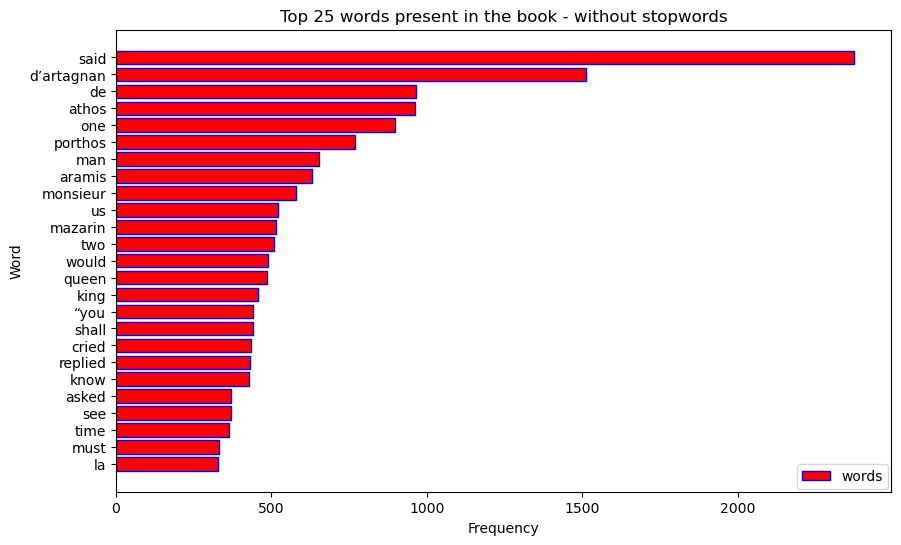

In [4]:
get_book_info()
# Here is an example of a URL below, but feel free to try the code with a different book
# https://www.gutenberg.org/cache/epub/1259/pg1259.txt  

### Compact version -  it will just display the relevant graph

Enter the URL of the book: https://www.gutenberg.org/cache/epub/1259/pg1259.txt


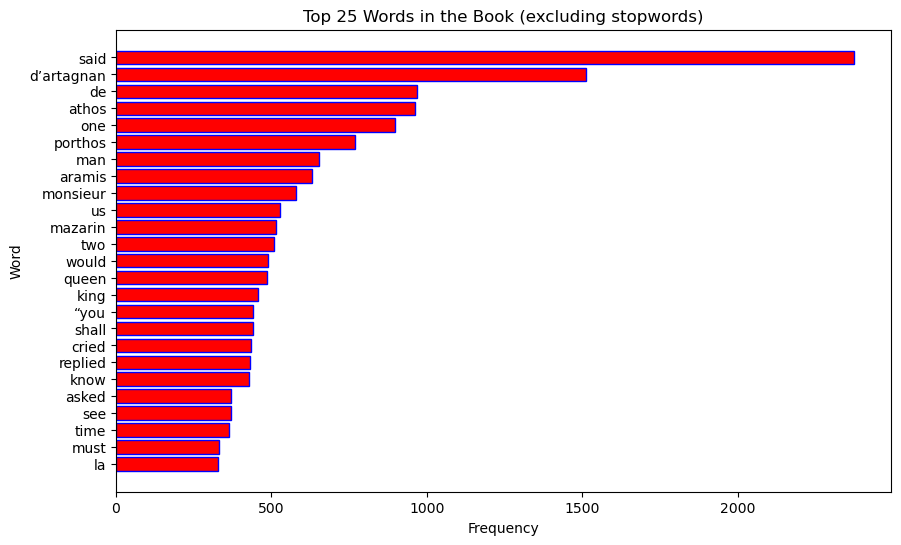

In [5]:
stop_words = ['“i','“and','gutenberg-tm',"i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

def get_book_text(url):
    response = requests.get(url)
    return response.text

def clean_word(word):
    word = word.lower()
    word = word.translate(str.maketrans('', '', punctuation))
    return word

def clean_book(book):
    cleaned_text = []
    book_split = book.split()

    for word in book_split:
        cleaned_word = clean_word(word)
        if cleaned_word and cleaned_word not in stop_words:
            cleaned_text.append(cleaned_word)

    return cleaned_text

def plot_word_frequency(word_counts, num_words=25):
    words, counts = zip(*word_counts.most_common(num_words))
    plt.figure(figsize=(10, 6))
    plt.barh(words, counts, color="red", edgecolor="blue")
    plt.xlabel("Frequency")
    plt.ylabel("Word")
    plt.title("Top 25 Words in the Book (excluding stopwords)")
    plt.gca().invert_yaxis()
    plt.show()

def main():
    book_url = input("Enter the URL of the book: ")
    book_text = get_book_text(book_url)
    cleaned_text = clean_book(book_text)
    word_counts = Counter(cleaned_text)
    plot_word_frequency(word_counts)

if __name__ == "__main__":
    main()

### Part-of-speech (POS) tagging involves assigning grammatical parts of speech (such as nouns, verbs, adjectives) to each word in a sentence.

In [6]:
import requests
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from string import punctuation

def get_book_text(url):
    response = requests.get(url)
    return response.text

def clean_word(word):
    word = word.lower()
    word = word.strip(punctuation)
    return word

# Mapping POS tags as descriptive names
pos_mapping = {
    'CC': 'Coordinating Conjunction',
    'CD': 'Cardinal Number',
    'DT': 'Determiner',
    'IN': 'Preposition or Subordinating Conjunction',
    'JJ': 'Adjective',
    'NN': 'Noun, Singular or Mass',
    'NNS': 'Noun, Plural',
    'VB': 'Verb, Base Form',
    'VBG': 'Verb, Gerund or Present Participle',
    'VBD': 'Verb, Past Tense',
    'VBN': 'Verb, Past Participle',
    'RB': 'Adverb',
    'PRP': 'Personal Pronoun',
    'PRP$': 'Possessive Pronoun',
    'WRB': 'Wh-adverb',
    'WP': 'Wh-pronoun',
    'WDT': 'Wh-determiner',
    'MD': 'Modal',
    'TO': 'To',
    'EX': 'Existential there',
}

book_url = "https://www.gutenberg.org/cache/epub/1259/pg1259.txt"
book_text = get_book_text(book_url)
book_words = word_tokenize(book_text)

# Cleaning and perform POS tagging
cleaned_words = [clean_word(word) for word in book_words if word.isalpha()]
pos_tags = pos_tag(cleaned_words)

# Printing the POS tagged words with explanations
for word, pos in pos_tags[150:170]:  
    pos_explanation = pos_mapping.get(pos, 'Unknown')
    print(f"Word: {word}, POS: {pos} ({pos_explanation})")

Word: bragelonne, POS: FW (Unknown)
Word: ten, POS: CD (Cardinal Number)
Word: years, POS: NNS (Noun, Plural)
Word: later, POS: RB (Adverb)
Word: louise, POS: VBP (Unknown)
Word: de, POS: FW (Unknown)
Word: la, POS: FW (Unknown)
Word: valliere, POS: FW (Unknown)
Word: the, POS: DT (Determiner)
Word: man, POS: NN (Noun, Singular or Mass)
Word: in, POS: IN (Preposition or Subordinating Conjunction)
Word: the, POS: DT (Determiner)
Word: iron, POS: NN (Noun, Singular or Mass)
Word: mask, POS: NN (Noun, Singular or Mass)
Word: project, POS: NN (Noun, Singular or Mass)
Word: gutenberg, POS: NN (Noun, Singular or Mass)
Word: ebook, POS: NN (Noun, Singular or Mass)
Word: listed, POS: VBN (Verb, Past Participle)
Word: below, POS: IN (Preposition or Subordinating Conjunction)
Word: is, POS: VBZ (Unknown)
